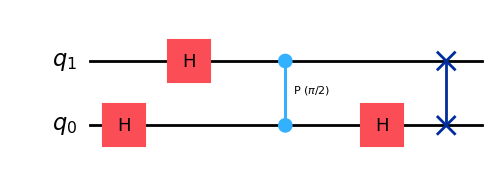

<IPython.core.display.Latex object>

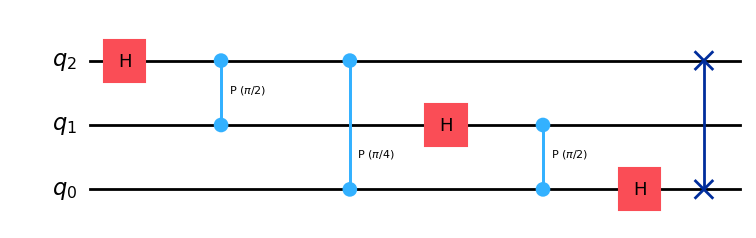

<IPython.core.display.Latex object>

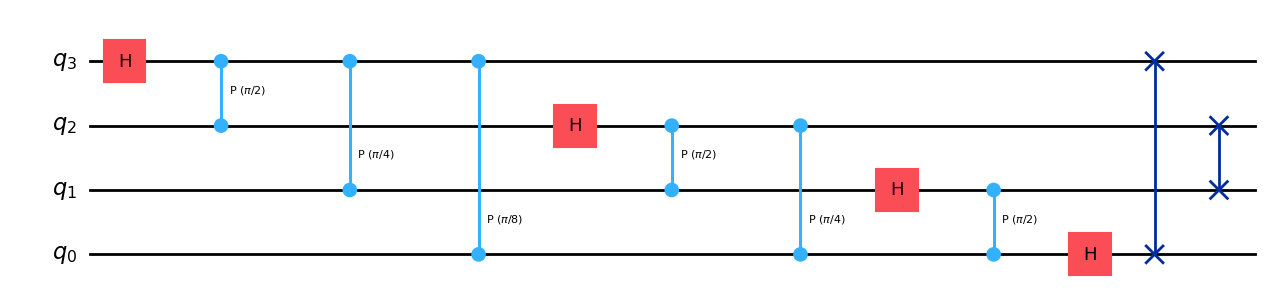

<IPython.core.display.Latex object>

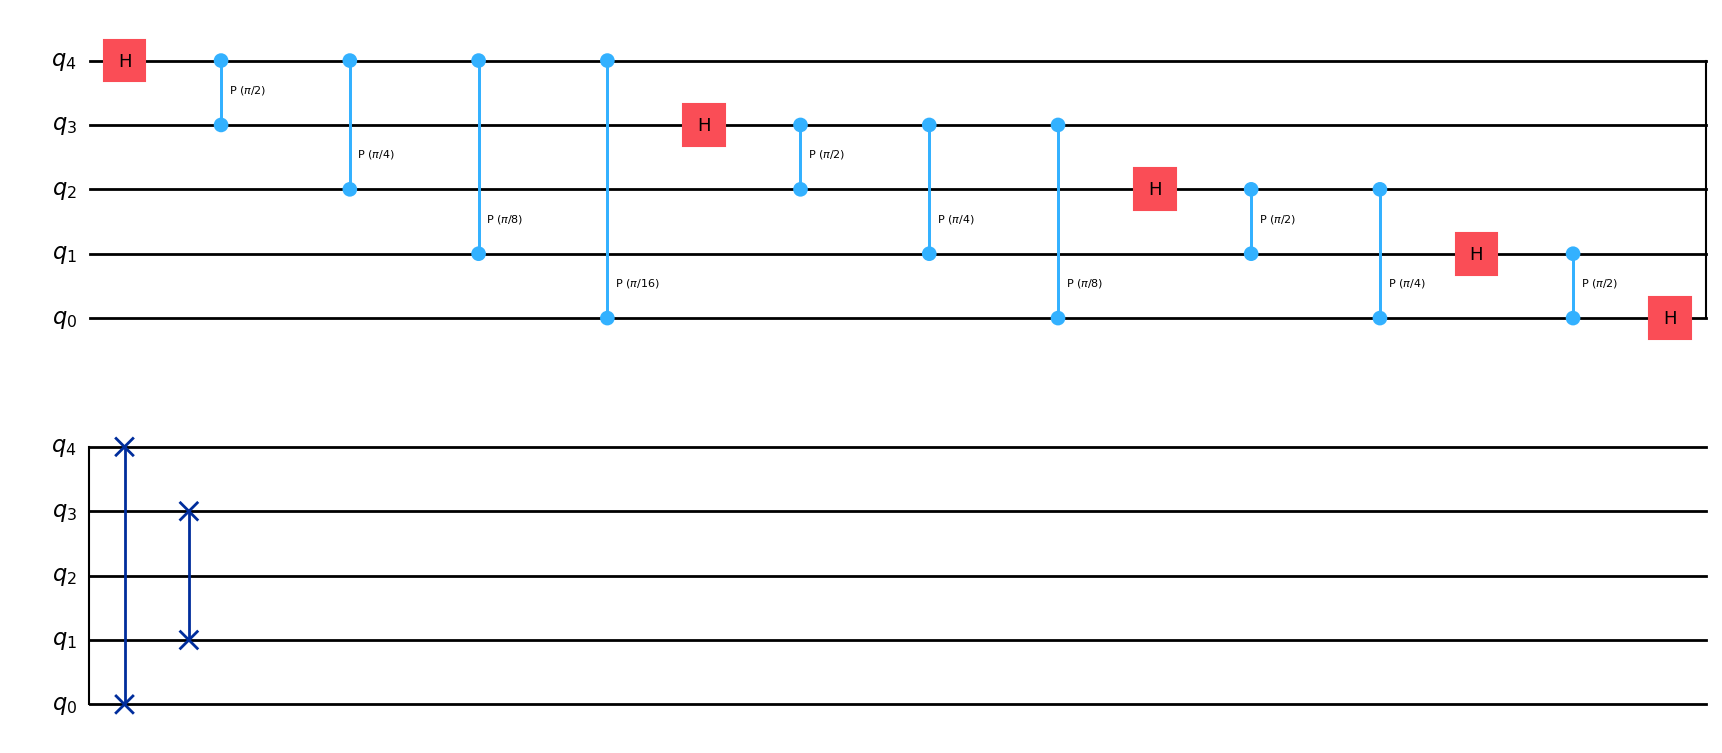

<IPython.core.display.Latex object>

In [9]:
"""LAB 1 PROBLEM"""


import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, CXGate
from IPython.display import display, Latex


#qft.cx(0,1) .cx(control, target)

qft = QuantumCircuit(2)
##############################
# add gates to your circuit here
theta = 2 * np.pi / 2**2

# Apply controlled phase gate with qubit 0 as control and qubit 1 as target
qft.h(1)
qft.h(0)
qft.cp(theta, 0, 1)
qft.h(0)
qft.swap(0,1)

##############################

display(qft.draw(output='mpl',justify='none', reverse_bits=True))

QFT4 = Operator(qft)
display(array_to_latex(QFT4))




qft = QuantumCircuit(3)

##############################
# add gates to your circuit here


theta1 = np.pi / 2
theta2 = np.pi / 2**2


# Apply controlled phase gate with qubit 0 as control and qubit 1 as target
qft.h(2)
qft.cp(theta1, 1, 2)
qft.cp(theta2, 0 ,2)
qft.h(1)
qft.cp(theta1, 0, 1)
qft.h(0)

qft.swap(0,2)


##############################

display(qft.draw(output='mpl',justify='none',reverse_bits=True))

QFT8 = Operator(qft)
display(array_to_latex(QFT8))



qft = QuantumCircuit(4)

##############################
# add gates to your circuit here

theta1 = np.pi / 2
theta2 = np.pi / 2**2
theta3 = np.pi/2**3



# Apply controlled phase gate with qubit 0 as control and qubit 1 as target
qft.h(3) 
qft.cp(theta1, 2, 3)
qft.cp(theta2, 1, 3)
qft.cp(theta3, 0, 3)
qft.h(2)
qft.cp(theta1, 1, 2)
qft.cp(theta2, 0, 2)
qft.h(1)
qft.cp(theta1, 0, 1)
qft.h(0)
qft.swap(1,2)
qft.swap(0,3)



##############################

display(qft.draw(output='mpl', justify='none',reverse_bits=True))

QFT16 = Operator(qft)
display(array_to_latex(QFT16))



qft = QuantumCircuit(5)

##############################
# add gates to your circuit here

theta1 = np.pi / 2
theta2 = np.pi / 2**2
theta3 = np.pi/2**3
theta4 = np.pi/2**4



# Apply controlled phase gate with qubit 0 as control and qubit 1 as target

qft.h(4)
qft.cp(theta1, 3, 4)
qft.cp(theta2, 2, 4)
qft.cp(theta3, 1, 4)
qft.cp(theta4, 0, 4)
qft.h(3) 
qft.cp(theta1, 2, 3)
qft.cp(theta2, 1, 3)
qft.cp(theta3, 0, 3)
qft.h(2)
qft.cp(theta1, 1, 2)
qft.cp(theta2, 0, 2)
qft.h(1)
qft.cp(theta1, 0, 1)
qft.h(0)
qft.swap(0,4)
qft.swap(1,3)

##############################

display(qft.draw(output='mpl', justify='none',reverse_bits=True))

QFT32 = Operator(qft)
display(array_to_latex(QFT32))










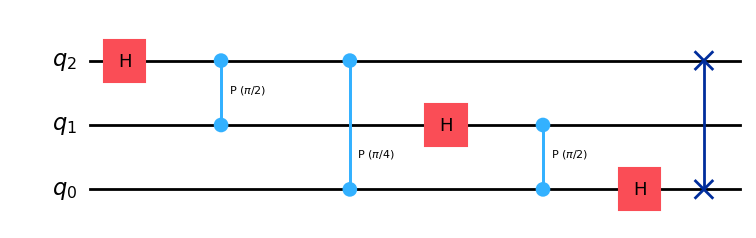

<IPython.core.display.Latex object>

0

In [7]:
"""This code generalizes the recipe in the previous block for N qubits"""


import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from IPython.display import display

def qft_circuit(N):
    """
    Function to create a QFT circuit for N qubits.
    
    Arguments:
    N (int): Number of qubits
    
    Returns:
    qft (QuantumCircuit): Quantum Fourier Transform circuit for N qubits
    QFT_matrix (Operator): Matrix form of the QFT
    """
    
    qft = QuantumCircuit(N)

    # Apply Hadamard and controlled phase gates
    for qubit in range(N):
        qft.h(N - qubit - 1)                              # Apply Hadamard gate to the current qubit (starting from top qubit and iterate downwards)
        for target in range(qubit + 1, N):                # iterate over the qubits below
            theta = np.pi / 2**(target - qubit)           # calculating Phase angle between pair of qubits
            qft.cp(theta, N - target - 1, N - qubit - 1)  # Apply corresponding controlled phase gate
            #qft.cx(N - target - 1, N - qubit - 1)        # check for correct target qubit (control phase gate is ambigious as drawn)

    # Swap gates for reversing the qubit order
    for i in range(N // 2):
        qft.swap(i, N - i - 1)

    # Display the circuit
    display(qft.draw(output='mpl', justify='none', reverse_bits=True))

    # Get the matrix form of the QFT circuit
    QFT_matrix = Operator(qft)

    # Display the matrix in LaTeX format
    display(array_to_latex(QFT_matrix))

    #return qft, QFT_matrix
    return 0

# Example usage: Generate QFT circuit and matrix for any generic integer N qubits
N = 3  # Parameter to change (N = 2, for the Lab in question)
qft_circuit(N)
